In [1]:
from qiskit import QuantumCircuit
import numpy as np

In [2]:
mycircuit = QuantumCircuit(2)
mycircuit.ry(np.pi,0)
mycircuit.id(0)
mycircuit.x(0)
mycircuit.y(0)
mycircuit.z(0)
mycircuit.rx(np.pi/4,1)
mycircuit.rz(np.pi/3,1)
mycircuit.cx(0,1)
mycircuit.h(1)
mycircuit.rz(np.pi/4,1)
mycircuit.rz(np.pi/4,1)


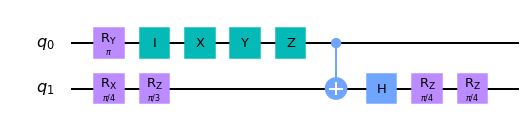

In [3]:
mycircuit.draw('mpl')

In [4]:
def decompose_circuit(circuit):
    new_circuit = QuantumCircuit(circuit.num_qubits)
    for i in range(len(circuit)):
        if str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.h.HGate':
            qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
            new_circuit.rz(np.pi/2,qubit)
            new_circuit.rx(np.pi/2,qubit)
            new_circuit.rz(np.pi/2,qubit)
        elif str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.i.IGate':
            qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
            new_circuit.rx(0, qubit)
        elif str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.x.XGate':
            qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
            new_circuit.rx(np.pi, qubit)
        elif str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.y.YGate':
            qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
            new_circuit.rz(np.pi/2, qubit)
            new_circuit.rx(np.pi, qubit)
            new_circuit.rz(-np.pi/2, qubit)
        elif str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.z.ZGate':
            qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
            new_circuit.rz(np.pi,qubit)
        elif str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.rx.RXGate':
            qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
            theta = circuit._data[i][0].params[0]
            new_circuit.rx(theta,qubit)
        elif str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.rz.RZGate':
            qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
            theta = circuit._data[i][0].params[0]
            new_circuit.rz(theta,qubit)
        elif str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.ry.RYGate':
            qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
            theta = circuit._data[i][0].params[0]
            new_circuit.rz(np.pi/2, qubit)
            new_circuit.rx(theta, qubit)
            new_circuit.rz(-np.pi/2, qubit)
        elif str(circuit[i][0]).split()[0] == '<qiskit.circuit.library.standard_gates.x.CXGate':
            qubit1 = int(str(circuit[i][1][0]).split()[-1].split(')')[0])
            qubit2 = int(str(circuit[i][1][1]).split()[-1].split(')')[0])
            new_circuit.rz(-np.pi/2,qubit2)
            new_circuit.rx(np.pi/2,qubit2)
            new_circuit.cz(qubit1,qubit2)
            new_circuit.rz(np.pi,qubit1)
            new_circuit.rx(-np.pi/2,qubit2)
            new_circuit.rz(np.pi/2,qubit2)
    return new_circuit

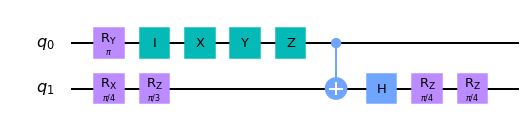

In [5]:
mycircuit.draw('mpl')

In [6]:
newcircuit = decompose_circuit(mycircuit)


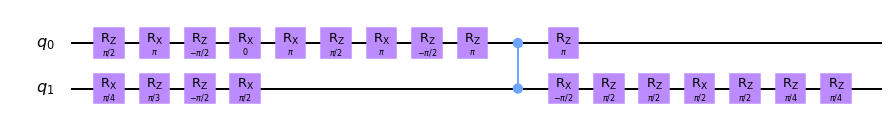

In [7]:
newcircuit.draw('mpl')

In [8]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('01')
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([ 8.92399101e-01+9.90457605e-02j,
             -5.46436851e-17-6.06480368e-18j,
             -2.39117618e-01+3.69643811e-01j,
             -1.46417313e-17+2.26341555e-17j],
            dims=(2, 2))

In [9]:
new_sv_d = sv.evolve(newcircuit)
new_sv_d

Statevector([9.90457605e-02-8.92399101e-01j,
             5.46436851e-17+6.06480368e-18j,
             3.69643811e-01+2.39117618e-01j,
             1.46417313e-17-2.26341555e-17j],
            dims=(2, 2))

In [10]:
from qiskit.quantum_info import state_fidelity
state_fidelity(new_sv,new_sv_d)

0.9999999999999996

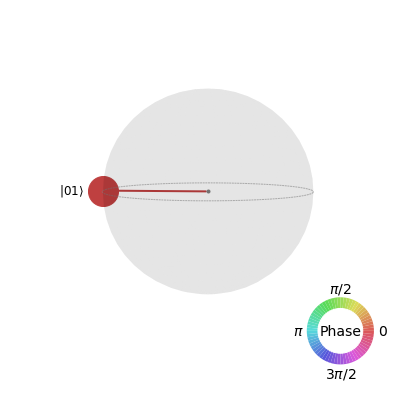

In [11]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv.data)

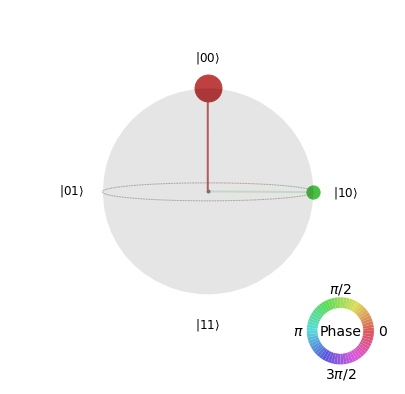

In [12]:
plot_state_qsphere(new_sv.data)

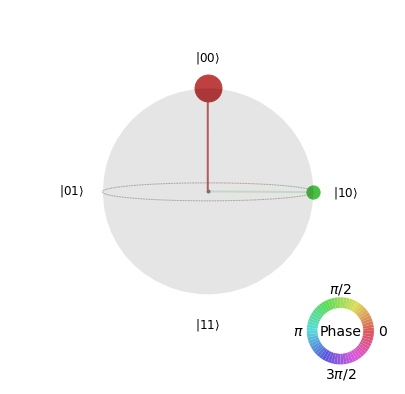

In [13]:
plot_state_qsphere(new_sv_d.data)

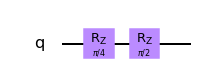

In [14]:
testcircuit = QuantumCircuit(1)
testcircuit.rz(np.pi/4,0)
testcircuit.rz(np.pi/2,0)
testcircuit.draw('mpl')

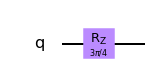

In [15]:
reducedcircuit = QuantumCircuit(1)
reducedcircuit.rz(np.pi/4+np.pi/2,0)
reducedcircuit.draw('mpl')

In [16]:
def is_circuit_reducable(circuit):
     for i in range(len(circuit)-1):
        if str(circuit[i][0]).split()[0] == str(circuit[i+1][0]).split()[0]\
        and int(str(circuit[i][1]).split()[-1].split(')')[0]) == int(str(circuit[i+1][1]).split()[-1].split(')')[0]):
            return True

In [17]:
def reduce_circuit(circuit):
    
    rxgate = '<qiskit.circuit.library.standard_gates.rx.RXGate'
    rzgate = '<qiskit.circuit.library.standard_gates.rz.RZGate'
    czgate = '<qiskit.circuit.library.standard_gates.z.CZGate'
    deletegate = None
    new_circuit = QuantumCircuit(circuit.num_qubits)

    if is_circuit_reducable(circuit) == True:
        for i in range(len(circuit)-1):
            if i == deletegate:
                continue
            if str(circuit[i][0]).split()[0] == str(circuit[i+1][0]).split()[0]\
            and int(str(circuit[i][1]).split()[-1].split(')')[0]) == int(str(circuit[i+1][1]).split()[-1].split(')')[0]):
                qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
                theta1 = circuit._data[i][0].params[0]
                theta2 = circuit._data[i+1][0].params[0]
                if str(circuit[i][0]).split()[0] == rxgate:
                    new_circuit.rx(theta1+theta2, qubit)
                
                elif str(circuit[i][0]).split()[0] == rzgate:
                    new_circuit.rz(theta1+theta2, qubit)
               
                deletegate = i+1
            elif str(circuit[i][0]).split()[0] == rxgate:
                qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
                theta = circuit._data[i][0].params[0]
                new_circuit.rx(theta, qubit)
            elif str(circuit[i][0]).split()[0] == rzgate:
                qubit = int(str(circuit[i][1]).split()[-1].split(')')[0])
                theta = circuit._data[i][0].params[0]
                new_circuit.rz(theta, qubit)
            elif str(circuit[i][0]).split()[0] == czgate:
                qubit1 = int(str(circuit[i][1][0]).split()[-1].split(')')[0])
                qubit2 = int(str(circuit[i][1][1]).split()[-1].split(')')[0])
                new_circuit.cz(qubit1, qubit2)
        #Last layer
        if i+1 == deletegate:
                return new_circuit
        if str(circuit[-1][0]).split()[0] == rxgate:
                qubit = int(str(circuit[-1][1]).split()[-1].split(')')[0])
                theta = circuit._data[-1][0].params[0]
                new_circuit.rx(theta, qubit)
        elif str(circuit[-1][0]).split()[0] == rzgate:
                qubit = int(str(circuit[-1][1]).split()[-1].split(')')[0])
                theta = circuit._data[-1][0].params[0]
                new_circuit.rz(theta, qubit)
        elif str(circuit[-1][0]).split()[0] == czgate:
                qubit1 = int(str(circuit[-1][1][0]).split()[-1].split(')')[0])
                qubit2 = int(str(circuit[-1][1][1]).split()[-1].split(')')[0])
                new_circuit.cz(qubit1, qubit2)
        return new_circuit
    else:
        return circuit

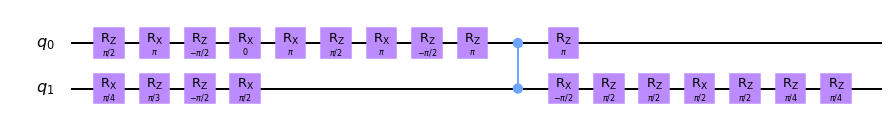

In [18]:
newcircuit.draw('mpl')


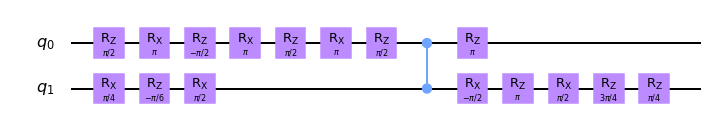

In [19]:
reducedcircuit = reduce_circuit(newcircuit)
reducedcircuit.draw('mpl')

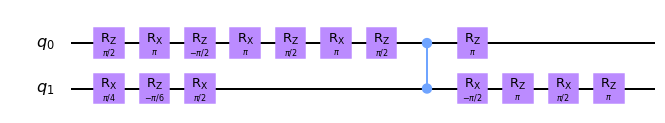

In [20]:
reducedcircuit = reduce_circuit(reducedcircuit)
reducedcircuit.draw('mpl')

In [21]:
def decompose_reduce_circuit(circuit):
    decomposed_circuit = decompose_circuit(circuit)
    last_reduced_circuit = decomposed_circuit
    reduced_circuit = reduce_circuit(circuit)
    while not (reduced_circuit == last_reduced_circuit):
        reduced_circuit = reduce_circuit(circuit)
        return reduced_circuit
    return reduced_circuit
    

In [22]:
#final_circuit = decompose_reduce_circuit(mycircuit)
#final_circuit.draw('mpl')